In [15]:
import sys
import os 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, os.path.join(os.path.dirname(os.path.abspath("")),"Code","Travis"))
import data_helper
import utils
import responses_analysis
import plotting
import config 

save_path = config.save_path
data_path = config.data_path
if not save_path.exists():
    save_path.mkdir()


color_dict = config.color_dict
order = config.order

In [16]:
###load in 2P data
test = utils.findUnanalyzedStacks(data_path, pattern="**/2P/L23/[0-9]*", foldername="all")
twop_mice = responses_analysis.get2Pmice(data_path, test)
twop_mice = data_helper.getData(twop_mice)
twop_mice.head()

**/2P/L23/[0-9]* all


,Mouse,Sex,Genotype,DOB,2P_path,total_neurons,sig_responders,sound_responsive_percent,signalCorr,noiseCorr
0,m602,F,Thy1-GC6s; Cdh23 (Ahl/ahl),12/6/2021,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,663,121,18.250377,0.086338,0.005453
1,m603,F,Thy1-GC6s; Cdh23 (Ahl/ahl),12/6/2021,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,704,105,14.914773,0.052694,0.004246
2,m609,F,Thy1-GC6s; Cdh23 (ahl/ahl),12/6/2021,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,684,88,12.865497,0.045551,0.001923
3,m670,F,Thy1-GC6s; Cdh23 (Ahl/ahl),1/23/2022,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,1529,694,45.389143,0.076358,0.003595
4,m674,F,Thy1-GC6s; Cdh23 (ahl/ahl),1/23/2022,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,2250,587,26.088889,0.053687,0.002320


C:\Users\travisb\AppData\Local\Temp\ipykernel_35516\4111132580.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ahl B6','Ahl+ B6','Ahl+\nCBA.B6'], ha='center',x=0)


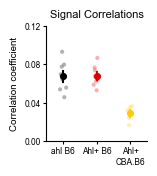

In [17]:
np.random.seed(51)

fig, ax = plt.subplots(figsize=(1.3,1.5))
sns.pointplot(twop_mice, y="signalCorr", x = "Genotype", hue = "Genotype", order = order, palette=color_dict, markersize=4, linewidth = 1.5, errorbar='se')

sns.stripplot(data = twop_mice, y="signalCorr", x = "Genotype", hue = "Genotype", marker='o', size=3, legend = None, palette=color_dict, alpha = 0.3)
#sns.catplot(data = twop_mice, x="signalCorr", y = "Genotype", hue = "Genotype", palette= color_dict, estimator='Mean',order = order, ax=g)
#sns.stripplot(twop_mice, x="Genotype", y = "total_offset_prop", hue = "Genotype", marker='o', size=3, legend = None, palette=color_dict, alpha = 0.3)

plt.ylim([0,.12])
plt.yticks(np.arange(0,.13,0.04))
ax.set_xticklabels(['ahl B6','Ahl+ B6','Ahl+\nCBA.B6'], ha='center',x=0)
ax.set_xlabel("")
ax.set_ylabel("Correlation coefficient", fontsize=7)
ax.set_title("Signal Correlations")
ax.title.set_size(8)
fig, ax = plotting.figQuality(fig, ax)
plt.savefig(save_path / "SF3_B_signalCorrelations.svg")
#plt.set_figwidth(3.5)



In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('signalCorr ~ C(Genotype) + C(Sex) + C(Genotype):C(Sex)', data=twop_mice).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Genotype),0.005702,2.0,16.734750,0.000151
C(Sex),0.000072,1.0,0.420453,0.526514
C(Genotype):C(Sex),0.000171,2.0,0.501317,0.615529
Residual,0.002556,15.0,NaN,NaN


In [19]:
from scipy import stats
import statsmodels.stats.multicomp as mc

comp1 = mc.MultiComparison(twop_mice['signalCorr'], twop_mice['Genotype'])
tbl, a1, a2 = comp1.allpairtest(stats.ttest_ind, method= "bonf")
print(tbl)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
             group1                       group2             stat   pval  pval_corr reject
------------------------------------------------------------------------------------------
(F1) Thy1-GC6s; Cdh23 (Ahl/ahl) Thy1-GC6s; Cdh23 (Ahl/ahl) -6.8264    0.0    0.0001   True
(F1) Thy1-GC6s; Cdh23 (Ahl/ahl) Thy1-GC6s; Cdh23 (ahl/ahl) -5.0173 0.0004    0.0012   True
     Thy1-GC6s; Cdh23 (Ahl/ahl) Thy1-GC6s; Cdh23 (ahl/ahl)  0.0529 0.9585       1.0  False
------------------------------------------------------------------------------------------


C:\Users\travisb\AppData\Local\Temp\ipykernel_35516\861670523.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ahl B6','Ahl B6','Ahl+\nCBA.B6'], ha='center',x=0)


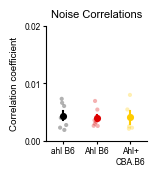

In [20]:
np.random.seed(51)

fig, ax = plt.subplots(figsize=(1.3,1.5))

sns.pointplot(twop_mice, y="noiseCorr", x = "Genotype", hue = "Genotype", order = order, palette=color_dict, markersize=4, linewidth = 1.5, clip_on=False, errorbar='se')

#sns.boxplot(twop_mice, y="signalCorr",  x="Genotype", hue = "Genotype", order =order , palette=color_dict, fill = False, saturation=0.75, width = 0.2, linewidth=1.5, showcaps=False)
sns.stripplot(data = twop_mice, y="noiseCorr", x = "Genotype", hue = "Genotype", marker='o', size=3, legend = None, palette=color_dict, alpha = 0.3, clip_on=False)
#sns.catplot(data = twop_mice, x="signalCorr", y = "Genotype", hue = "Genotype", palette= color_dict, estimator='Mean',order = order, ax=g)
#sns.stripplot(twop_mice, x="Genotype", y = "total_offset_prop", hue = "Genotype", marker='o', size=3, legend = None, palette=color_dict, alpha = 0.3)

plt.ylim([0,0.02])
plt.yticks(np.arange(0,0.025,0.01))
ax.set_xticklabels(['ahl B6','Ahl B6','Ahl+\nCBA.B6'], ha='center',x=0)
ax.set_xlabel('')
ax.set_ylabel("Correlation coefficient", fontsize=7)
ax.set_title("Noise Correlations")
ax.title.set_size(8)
ax.set_clip_on(False)
fig, ax = plotting.figQuality(fig, ax)
plt.savefig(save_path / "SF3_C_noiseCorrelations.svg")
#plt.set_figwidth(3.5)


In [21]:
#stats
model = ols('noiseCorr ~ C(Genotype) + C(Sex) + C(Genotype):C(Sex)', data=twop_mice).fit()
sm.stats.anova_lm(model, typ=2)

## ANOVA not significant, post-hoc test not necessary

,sum_sq,df,F,PR(>F)
C(Genotype),5.415023e-07,2.0,0.067600,0.934917
C(Sex),4.430800e-06,1.0,1.106268,0.309545
C(Genotype):C(Sex),7.733258e-06,2.0,0.965407,0.403274
Residual,6.007769e-05,15.0,NaN,NaN
